In [1]:
from itertools import product

import numpy as np

from matplotlib import pyplot as plt, colors, lines, ticker
from matplotlib.patches import Rectangle

import sympy as smp

In [2]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{bm}')
plt.rcParams['figure.figsize'] = [3.25, 2.5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = plt.rcParams['xtick.labelsize']
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['patch.linewidth'] = 0.7
plt.rcParams['hatch.linewidth'] = 0.7
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = plt.rcParams['xtick.major.width']
plt.rcParams['ytick.minor.width'] = plt.rcParams['xtick.minor.width']
color_cycle = ['#003366', '#990000', '#669900']
#color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


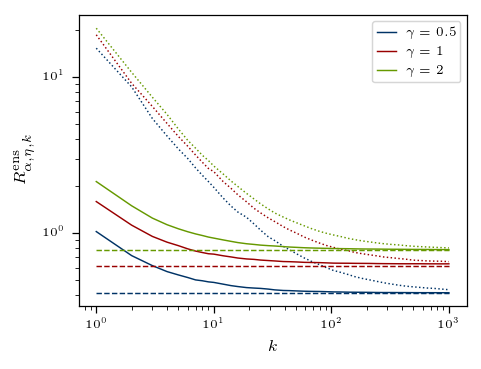

In [3]:
risk_versus_k = np.load('risk_versus_k.npz')
gammas = risk_versus_k['gammas']
ks = risk_versus_k['ks']
risks_ensemble = risk_versus_k['risks_ensemble']
risks_ensemble_eta = risk_versus_k['risks_ensemble_eta']
risks_ridge = risk_versus_k['risks_ridge']

fig, ax = plt.subplots()

for t, gamma in enumerate(gammas):
    plt.loglog(ks, risks_ensemble[t, :, :].mean(0), color=color_cycle[t], label=r'$\gamma=%g$' % gamma)
    plt.plot(ks, risks_ensemble_eta[t, :, :].mean(0), ':', color=color_cycle[t])
    plt.plot(ks, [risks_ridge[t]] * len(ks), '--', color=color_cycle[t])

plt.xlabel(r'$k$')
plt.ylabel(r'$R_{\alpha, \eta, k}^\mathrm{ens}$')
plt.legend() 
plt.tight_layout()
plt.savefig('risk_versus_k.pdf')
plt.show()

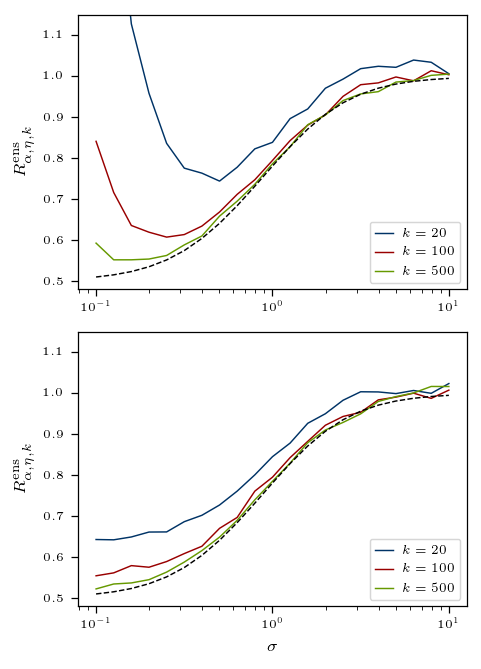

In [4]:
risk_versus_sigma = np.load('risk_versus_sigma.npz')
sigmas = risk_versus_sigma['sigmas']
ks = risk_versus_sigma['ks']
risks_ensemble = risk_versus_sigma['risks_ensemble']
risks_ridge = risk_versus_sigma['risks_ridge']

risk_versus_sigma_optimal_alpha = np.load('risk_versus_sigma_optimal_alpha.npz')
risks_ensemble_optimal_alpha = risk_versus_sigma_optimal_alpha['risks_ensemble']

plt.figure(figsize=(3.25, 4.5))
plt.subplot(2, 1, 1)

for j, k in enumerate(ks):
    plt.semilogx(sigmas, risks_ensemble[:, :, j].mean(1), color=color_cycle[j], label='$k=%d$' % k)
plt.plot(sigmas, risks_ridge, '--', color='black')

plt.ylim(0.48, 1.15)
plt.ylabel(r'$R_{\alpha, \eta, k}^\mathrm{ens}$')
plt.legend(loc='lower right') 

plt.subplot(2, 1, 2)

for j, k in enumerate(ks):
    plt.semilogx(sigmas, risks_ensemble_optimal_alpha[:, :, j].mean(1), color=color_cycle[j], label='$k=%d$' % k)
plt.plot(sigmas, risks_ridge, '--', color='black')

plt.ylim(0.48, 1.15)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$R_{\alpha, \eta, k}^\mathrm{ens}$')
plt.legend(loc='lower right') 


plt.tight_layout()
plt.savefig('risk_versus_sigma.pdf')
plt.show()

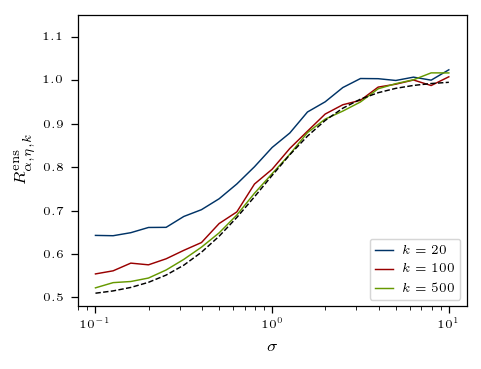

In [5]:
risk_versus_k = np.load('risk_versus_sigma_optimal_alpha.npz')
sigmas = risk_versus_k['sigmas']
ks = risk_versus_k['ks']
risks_ensemble = risk_versus_k['risks_ensemble']
risks_ridge = risk_versus_k['risks_ridge']

fig, ax = plt.subplots()

for j, k in enumerate(ks):
    plt.semilogx(sigmas, risks_ensemble[:, :, j].mean(1), color=color_cycle[j], label='$k=%d$' % k)
plt.plot(sigmas, risks_ridge, '--', color='black')

plt.ylim(0.48, 1.15)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$R_{\alpha, \eta, k}^\mathrm{ens}$')
plt.legend(loc='lower right') 

formatter = ticker.FuncFormatter(lambda x, _: '%.1f' % x)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.savefig('risk_versus_sigma_optimal_alpha.pdf')
plt.show()

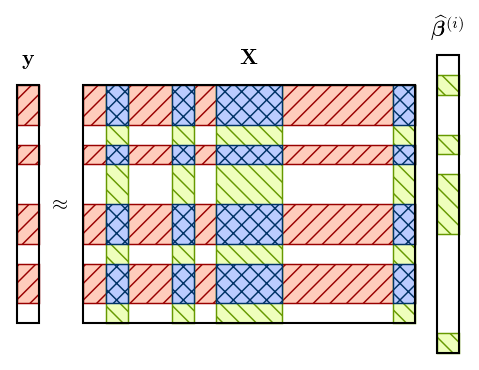

In [6]:
fig, ax = plt.subplots()

n, p = 12, 15

rows = [(1, 2), (4, 2), (8, 1), (10, 2)]
cols = [(1, 1), (4, 1), (6, 3), (14, 1)]

int_edgecolor = color_cycle[0]
int_facecolor = '#bbccff'
int_hatch = 'XXX'
col_edgecolor = color_cycle[2]
col_facecolor = '#eeffbb'
col_hatch = '\\\\\\'
row_edgecolor = color_cycle[1]
row_facecolor = '#ffccbb'
row_hatch = '///'

for y, height in rows:
    ax.add_patch(Rectangle((0, y), p, height, edgecolor=row_edgecolor, facecolor=row_facecolor, hatch=row_hatch))
    ax.add_patch(Rectangle((-3, y), 1, height, edgecolor=row_edgecolor, facecolor=row_facecolor, hatch=row_hatch))
    
for x, width in cols:
    ax.add_patch(Rectangle((x, 0), width, n, edgecolor=col_edgecolor, facecolor=col_facecolor, hatch=col_hatch))
    ax.add_patch(Rectangle((p + 1, (n + p) / 2 - x - width), 1, width, edgecolor=col_edgecolor, facecolor=col_facecolor, hatch=col_hatch))

for (x, width), (y, height) in product(cols, rows):
    ax.add_patch(Rectangle((x, y), width, height, edgecolor=int_edgecolor, facecolor=int_facecolor, hatch=int_hatch))

ax.add_patch(Rectangle((0, 0), p, n, fill=False, linewidth=1.0))
ax.add_patch(Rectangle((-3, 0), 1, n, fill=False, linewidth=1.0))
ax.add_patch(Rectangle((p+1, -(p - n) / 2), 1, p, fill=False, linewidth=1.0))

plt.text(-2.5, n + 1, r'${\mathbf{y}}$', fontsize=10, horizontalalignment='center')
plt.text(-1, n / 2, r'$\approx$', fontsize=10, horizontalalignment='center', verticalalignment='center')
plt.text(p / 2, n + 1, r'${\mathbf{X}}$', fontsize=10, horizontalalignment='center')
plt.text(p + 1.5, (n + p) / 2 + 1, r'${\widehat{\bm\beta}^{(i)}}$', fontsize=10, horizontalalignment='center')

plt.xlim(-3.1, p+2.1)
plt.ylim(-(p - n) / 2 - 0.1, (n + p) / 2 + 0.1)

plt.axis('off')
plt.tight_layout()

plt.savefig('subsampling.pdf')

plt.show()

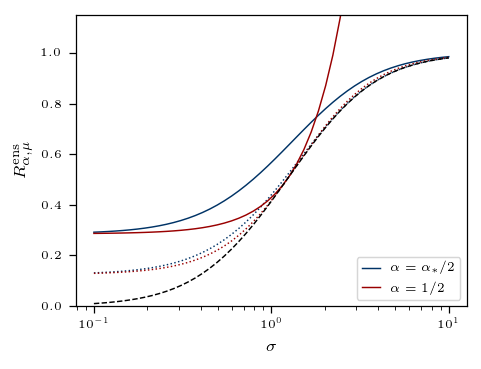

In [7]:
def ensemble_risk_ij(intersection_size, complement_intersection_size, gamma, sigma, eta=1):
    
    return complement_intersection_size * (1 + intersection_size * gamma / (eta - intersection_size * gamma)) + intersection_size * gamma * sigma**2 / (eta - intersection_size * gamma)


def ensemble_risk(alpha, gamma, sigma, k=None, eta=1):
    
    if k is None:
        return ensemble_risk_ij(alpha**2, (1 - alpha)**2, gamma, sigma, eta=1)
    else:
        return (1 - 1/k) * ensemble_risk_ij(alpha**2, (1 - alpha)**2, gamma, sigma, eta=1) + 1/k * ensemble_risk_ij(alpha, 1-alpha, gamma, sigma, eta=eta)


def ensemble_optimal_alpha(gamma, sigma, k=None, eta=None):
    
    if k is None:
    
        a = 1
        b = - (1 / gamma + 1 + sigma**2)
        c = 1 / gamma
        alpha = (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a)

        return alpha

    else:
        if eta is None:
            eta = 1
            
        alpha = smp.symbols('a', real=True)
        r = ensemble_risk(alpha, gamma, sigma, k, eta)
        drdalpha = smp.diff(r, alpha)
        numerator, _ = smp.fraction(smp.simplify(drdalpha))
        coeffs = smp.Poly(numerator).coeffs()
        roots = [np.abs(r) for r in np.roots(coeffs) if np.angle(r) < 1e-2 and 0 <= np.abs(r) <= 1/gamma]
        roots += [0, 1/gamma - 1e-6]
        
        return min(roots, key=lambda x: ensemble_risk(x, gamma, sigma, k, eta))


def ridge_optimal_risk(gamma, sigma):
    
    dobriban = 1 / 2 * (1 + (gamma - 1) / gamma / sigma**2 + np.sqrt((1 - (gamma - 1) / gamma / sigma**2)**2 + 4 / sigma**2))
    return (dobriban - 1) * sigma**2


def mu_scaled_risk(alpha, gamma, sigma, mu=1):
    
    return mu**2 * ensemble_risk(alpha, gamma, sigma) + (1 - mu)**2 + 2 * mu * (1 - mu) * (1 - alpha)


def optimal_mu(alpha, gamma, sigma):
    
    mu = alpha / (ensemble_risk(alpha, gamma, sigma) + 2*alpha - 1)
    return mu


def optimal_mu_scaled_risk(alpha, gamma, sigma):
    
    return mu_scaled_risk(alpha, gamma, sigma, optimal_mu(alpha, gamma, sigma))


sigmas = np.logspace(-1, 1)
gamma = 0.5

risks_ridge = [ridge_optimal_risk(gamma, sigma) for sigma in sigmas]
risks_alpha_half = []
risks_alpha_half_mu = []
risks_alpha_double = []
risks_alpha_double_mu = []
risks_half = []
risks_half_mu = []

for sigma in sigmas:
    
    alpha = ensemble_optimal_alpha(gamma, sigma)
    risks_alpha_half.append(ensemble_risk(alpha / 2, gamma, sigma))
    risks_alpha_half_mu.append(optimal_mu_scaled_risk(alpha / 2, gamma, sigma))
    risks_alpha_double.append(ensemble_risk(min(1, 2*alpha), gamma, sigma))
    risks_alpha_double_mu.append(optimal_mu_scaled_risk(min(1, 2*alpha), gamma, sigma))
    risks_half.append(ensemble_risk(1 / 2, gamma, sigma))
    risks_half_mu.append(optimal_mu_scaled_risk(1 / 2, gamma, sigma))

fig, ax = plt.subplots()

plt.semilogx(sigmas, risks_alpha_half, color=color_cycle[0], label=r'$\alpha=\alpha_*/2$')
plt.semilogx(sigmas, risks_alpha_half_mu, ':', color=color_cycle[0])
#plt.semilogx(sigmas, risks_alpha_double, color=color_cycle[1], label=r'$\alpha=\min\{1, 2\alpha_*\}$')
#plt.semilogx(sigmas, risks_alpha_double_mu, ':', color=color_cycle[1])
plt.semilogx(sigmas, risks_half, color=color_cycle[1], label=r'$\alpha=1/2$')
plt.semilogx(sigmas, risks_half_mu, ':', color=color_cycle[1])
plt.plot(sigmas, risks_ridge, '--', color='black')

plt.ylim(0, 1.15)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$R_{\alpha,\mu}^\mathrm{ens}$')
plt.legend(loc='lower right') 

formatter = ticker.FuncFormatter(lambda x, _: '%.1f' % x)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.savefig('risk_versus_sigma_tuned_mu.pdf')
plt.show()